In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [4]:
df = pd.read_csv("Obesity prediction.csv")
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

In [8]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [10]:
df.isnull().sum()

Gender            0
Age               0
Height            0
Weight            0
family_history    0
FAVC              0
FCVC              0
NCP               0
CAEC              0
SMOKE             0
CH2O              0
SCC               0
FAF               0
TUE               0
CALC              0
MTRANS            0
Obesity           0
dtype: int64

In [12]:
# Encode categorical features
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [14]:
# Example: Create BMI feature if not present
if 'Weight' in df.columns and 'Height' in df.columns:
    df['BMI'] = df['Weight'] / (df['Height']/100)**2

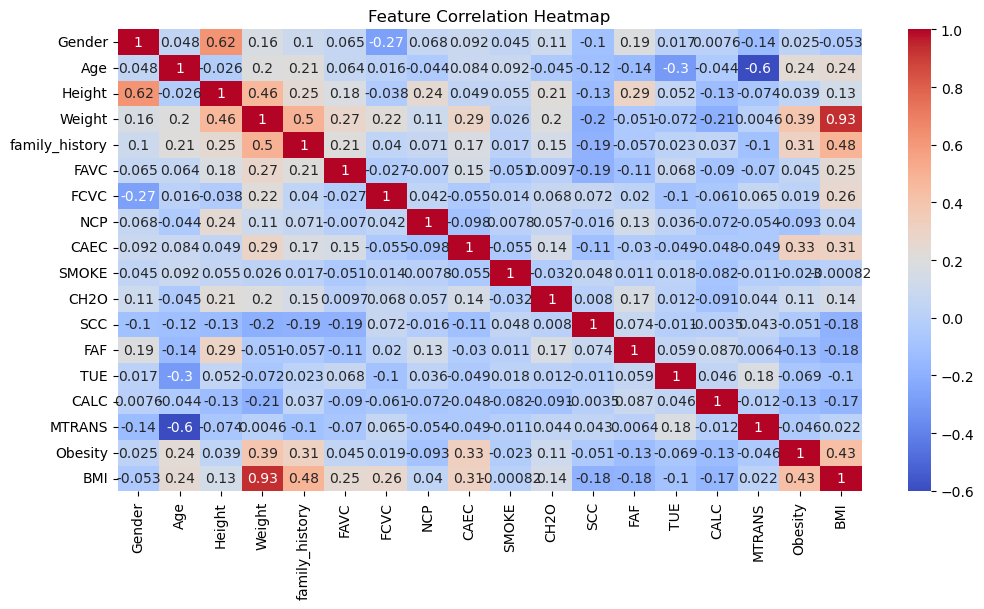

In [16]:
# Correlation heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [18]:
X = df.drop("Obesity", axis=1)  # Replace with your actual target column
y = df["Obesity"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

Accuracy: 0.9952718676122931

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        56
           1       0.97      1.00      0.98        62
           2       1.00      1.00      1.00        78
           3       1.00      1.00      1.00        58
           4       1.00      1.00      1.00        63
           5       1.00      0.98      0.99        56
           6       1.00      1.00      1.00        50

    accuracy                           1.00       423
   macro avg       1.00      0.99      1.00       423
weighted avg       1.00      1.00      1.00       423



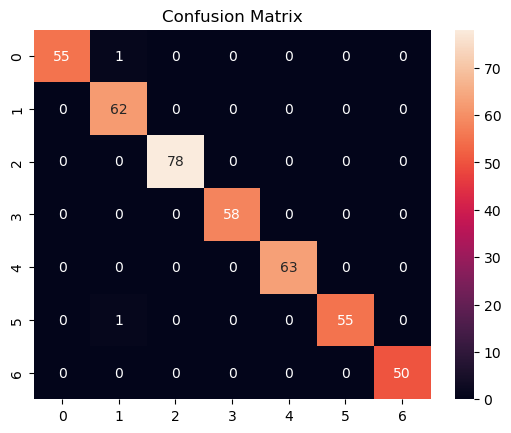

In [24]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

## What Dataset did you use?
I used the "Obesity prediction.csv" dataset, which contains various personal, health, lifestyle, and dietary attributes to predict whether an individual is obese. This includes features such as gender, age, height, weight, eating habits, and physical activity levels.

## Why Random Forest?
Handles both numerical and categorical data well

Robust to overfitting on smaller datasets

Easy to interpret feature importances

## Explain your project! I want to see the thinking behind the code essentially.
Why this project interested me:

Obesity is one of the most pressing public health issues globally. Predicting obesity based on lifestyle and dietary habits can provide early warnings and help with personalized intervention strategies. This project intrigued me because it merges healthcare with machine learning, offering a real-world application that can make a difference.

## 🛠️ Steps I took during the project:
Data Loading & Exploration:

I loaded the dataset using pandas and explored the data using .info(), .describe(), and checked for missing values.

I looked into data types, unique values, and overall structure to understand how to approach preprocessing.

Handling Missing Values:

I removed any rows with missing values to ensure the model isn’t biased or misled by incomplete data.

Encoding Categorical Features:

Since machine learning models don’t work directly with text, I encoded the categorical features using LabelEncoder.

Feature Engineering:

I added a BMI column derived from height and weight, which is a strong indicator of obesity and health status.

Data Visualization:

I used correlation heatmaps to identify relationships between features and detect redundancy or multicollinearity.

Data Splitting & Scaling:

I split the dataset into training and test sets using train_test_split and standardized the features using StandardScaler to ensure fair training.

Model Selection:

I chose the Random Forest Classifier because it:

Works well on mixed types of data

Is resistant to overfitting

Provides insights through feature importance

Generally gives strong baseline performance

Model Evaluation:

I evaluated the model using accuracy, confusion matrix, and classification report to assess precision, recall, and F1-score.

## 🧪 How I decided what model to use
I initially considered multiple models like Logistic Regression, SVM, and Decision Trees. However, I selected Random Forest because:

It handles non-linear relationships well.

It can manage both numerical and categorical features after encoding.

It provides good performance with minimal tuning.

It gives feature importance scores, which help interpret the model.